In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time
%matplotlib inline

In [2]:
# setup security 
access_token = '1006599768104144896-08Q8MuqehWAXLYxH4qfQPd3ihda2WW'
access_token_secret = 'hZGfKdUzY1t2jUrA5t2egNhoKTPCz457orKvFVVDD117G'
consumer_key = 'mVDo4ha0iWDHYXdalHH6g8tx7'
consumer_secret = 'A6vRmL8VmLwpncQD2at0PHkzBswjT7m70BWmpv0rMkxBbvIoan'

# setup file store
file = 'C:/Users/aluno/Documents/gabrielaapi.json'

In [3]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [4]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 30 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
stream.filter(track=['neymar', 'ronaldo', 'messi', 'sallah', 'hazard'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

401
401
401
**Finish**


In [75]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [68]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None]
    
print(tweets.head(10))

  lang                                               text country
0   en  RT @Chris726: Wow. Messi truly hates the kids ...    None
1   en  RT @espn: LeBron James. Cristiano Ronaldo. \n\...    None
2   pt  RT @Oledobrasil: E o pessoal sempre pergunta c...    None
3   en  RT @OlaTheOG: So you’re telling me Messi can c...    None
4   es  RT @toneatti0203: Vos Sos El Q No Sabe Nada Bo...    None
5   es  RT @turcocarp: Quiero que Messi gane el Mundia...    None
6   en  RT @twittatimes: Dont miss ur lip https://t.co...    None
7   en  RT @sharpdiv1: Messi is just a shite Barrie Mckay    None
8   es  RT @lauratapiasr: Juega en la primera división...    None
9   fr  Messi comparé par CR7 et par Maradona avec une...    None


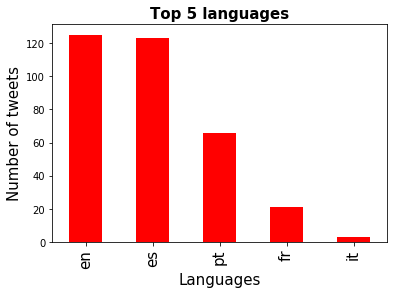

In [69]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

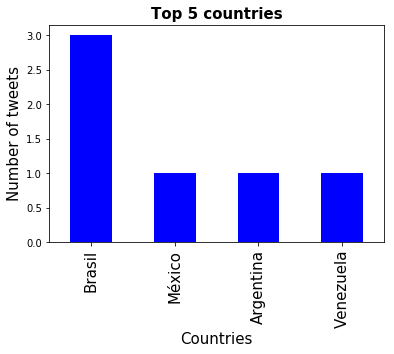

In [60]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [70]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [49]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('neymar', tweet['text']):
            players.append('neymar')
        elif word_in_text('messi', tweet['text']):
            players.append('messi')
        elif word_in_text('ronaldo', tweet['text']):
            players.append('ronaldo')
        elif word_in_text('sallah', tweet['text']):
            players.append('sallah')
        elif word_in_text('hazard', tweet['text']):
            players.append('hazard')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,en,RT @SiavoushF: Mexican fans: Messi.. Messi..\n...,None,messi
1,en,Such a messi job !! https://t.co/Aoy4owle56,None,messi
2,es,RT @champagnepapx1: Muy buena la formación de ...,None,None
3,en,Don't blame Messi penalty miss for Argentina f...,None,messi
4,en,RT @De_nas_: Who's your world best? \nRetweet ...,None,messi
5,en,"RT @MisterseunPR: See what your MCM, Messi cau...",None,messi
6,es,RT @FantasmadeNimo: ¿Entienen que Icardi no es...,None,messi
7,es,RT @InvictosSomos: ➔ ¿Acabado? Responde con un...,None,None
8,pt,RT @transf_min: Isto é Cristiano Ronaldo 🔥 htt...,None,ronaldo
9,en,"RT @rwohan: In 2016, Iceland tied Portugal, 1-...",None,messi


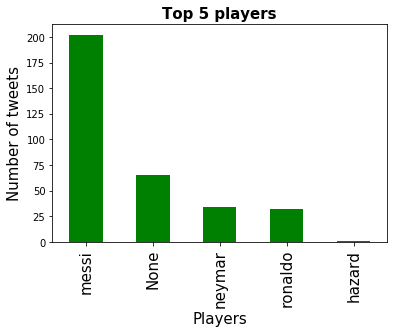

In [59]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='green')

In [ ]:
## Desafio: filtrando pelas coordenadas geográficas os tweets em português